In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
import env
from sklearn import metrics
import os
import wrangle as w
import re

**Exploring the Data and Dropping Unnecessary Rows**

After some exploring, there are 45854 (5.41%) entries that are '/', which I believe in the home page. Becasue this is not indicative of any specific program or lesson, I will drop these rows from the dataframe.

In [2]:
df = w.prepare_df()
df.head(20)

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,module,lesson,web_dev,data_science
timestamp,,,,,,,,,,,,,
2018-01-26 09:56:02,2018-01-26,09:56:02,[java-ii],1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,java-ii,java-ii,1,0
2018-01-26 09:56:05,2018-01-26,09:56:05,"[java-ii, object-oriented-programming]",1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,java-ii,object-oriented-programming,1,0
2018-01-26 09:56:06,2018-01-26,09:56:06,"[slides, object_oriented_programming]",1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,slides,object_oriented_programming,0,0
2018-01-26 09:56:24,2018-01-26,09:56:24,"[javascript-i, conditionals]",2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,javascript-i,conditionals,1,0
2018-01-26 09:56:41,2018-01-26,09:56:41,"[javascript-i, loops]",2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,javascript-i,loops,1,0
2018-01-26 09:56:46,2018-01-26,09:56:46,"[javascript-i, conditionals]",3,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,javascript-i,conditionals,1,0
2018-01-26 09:56:48,2018-01-26,09:56:48,"[javascript-i, functions]",3,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,javascript-i,functions,1,0
2018-01-26 09:56:59,2018-01-26,09:56:59,"[javascript-i, loops]",2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,javascript-i,loops,1,0
2018-01-26 09:58:26,2018-01-26,09:58:26,"[javascript-i, functions]",4,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,javascript-i,functions,1,0


In [3]:
# for value in df['module']:
#     if value.str.contains(keyword) for keyword in web_dev:
#     df['program'] = 'web_development'
# for value in df['module']:
#     if any(substring in value for substring in web_dev):
#         df['program'] = 'web_development'

# web_dev_df = df[df.module.str.contains('java|jquery|html|jquery|html|css|web', regex=True) ==True]
# ds_df = df[df.module.str.contains('sql|python|git|classification|regression|anomly|clustering|stats|storytelling|timeseries|distributed-ml|Regression', regex=True) ==True]

In [4]:
# df['web_dev'] = np.where(df.module.str.contains('java|jquery|html|jquery|html|css|web', regex=True) ==True, 1, 0)

In [5]:
# df['data_science'] = np.where(df.module.str.contains('sql|python|git|classification|regression|anomaly|clustering|stats|storytelling|timeseries|distributed-ml|Regression|scientist|pandas|Stats|AI-ML-DL|Cluster|Excel|control_structures|functions|ordinary_least_squares|Modeling|Probability|matplotlib|Explore|imports|Correlation', regex=True) ==True, 1, 0)

After preparing the data and more specifically assigning key words indictaive to Data Science and Web Developemnt to their respective programs, there is 24.07% of the data where the modeule name was not indicative of either program. 

In [6]:
round((len(df[(df['web_dev'] == 0) & (df['data_science'] == 0)]) / len(df)) * 100, 2)

24.07

In [7]:
# Taking a look at the cleaned dataframe

df.head()

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,module,lesson,web_dev,data_science
timestamp,,,,,,,,,,,,,
2018-01-26 09:56:02,2018-01-26,09:56:02,[java-ii],1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,java-ii,java-ii,1,0
2018-01-26 09:56:05,2018-01-26,09:56:05,"[java-ii, object-oriented-programming]",1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,java-ii,object-oriented-programming,1,0
2018-01-26 09:56:06,2018-01-26,09:56:06,"[slides, object_oriented_programming]",1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,slides,object_oriented_programming,0,0
2018-01-26 09:56:24,2018-01-26,09:56:24,"[javascript-i, conditionals]",2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,javascript-i,conditionals,1,0
2018-01-26 09:56:41,2018-01-26,09:56:41,"[javascript-i, loops]",2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,javascript-i,loops,1,0


In [8]:
# # Define the keywords for each category

# df['program'] = ''
# for i, values in df['module'].items():
#     if any(keyword in df['module'] for keyword in web_dev_keywords):
#         df.loc[i, 'program'] = 'web_development'
#     elif any(keyword in df['module'] for keyword in data_sci_keywords):
#         df.loc[i, 'program'] = 'data_science'

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 801475 entries, 2018-01-26 09:56:02 to 2021-04-21 16:44:39
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          801475 non-null  datetime64[ns]
 1   time          801475 non-null  object        
 2   path          801475 non-null  object        
 3   user_id       801475 non-null  int64         
 4   cohort_id     801475 non-null  float64       
 5   ip            801475 non-null  object        
 6   name          801475 non-null  object        
 7   start_date    801475 non-null  datetime64[ns]
 8   end_date      801475 non-null  datetime64[ns]
 9   module        801475 non-null  object        
 10  lesson        801475 non-null  object        
 11  web_dev       801475 non-null  int64         
 12  data_science  801475 non-null  int64         
dtypes: datetime64[ns](3), float64(1), int64(3), object(6)
memory usage: 85.6+ MB


**1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?**

In [10]:
# Creating a dataframe with just the Web Development traffic

web_dev = df[df.web_dev == 1]
web_dev.head()

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,module,lesson,web_dev,data_science
timestamp,,,,,,,,,,,,,
2018-01-26 09:56:02,2018-01-26,09:56:02,[java-ii],1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,java-ii,java-ii,1,0
2018-01-26 09:56:05,2018-01-26,09:56:05,"[java-ii, object-oriented-programming]",1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,java-ii,object-oriented-programming,1,0
2018-01-26 09:56:24,2018-01-26,09:56:24,"[javascript-i, conditionals]",2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,javascript-i,conditionals,1,0
2018-01-26 09:56:41,2018-01-26,09:56:41,"[javascript-i, loops]",2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,javascript-i,loops,1,0
2018-01-26 09:56:46,2018-01-26,09:56:46,"[javascript-i, conditionals]",3,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,javascript-i,conditionals,1,0


In [11]:
# Creating a dataframe with just the Data Science traffic
ds = df[df.data_science == 1]
ds.head()

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,module,lesson,web_dev,data_science
timestamp,,,,,,,,,,,,,
2018-01-26 10:08:34,2018-01-26,10:08:34,"[git, merge-conflict-demo]",10,21.0,97.105.19.61,Sequoia,2017-09-27,2018-02-15,git,merge-conflict-demo,0,1
2018-01-26 10:08:55,2018-01-26,10:08:55,"[git, working-in-teams]",10,21.0,97.105.19.61,Sequoia,2017-09-27,2018-02-15,git,working-in-teams,0,1
2018-01-26 11:48:17,2018-01-26,11:48:17,[mysql],16,21.0,97.105.19.61,Sequoia,2017-09-27,2018-02-15,mysql,mysql,0,1
2018-01-26 11:54:22,2018-01-26,11:54:22,"[git, cli]",4,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,git,cli,0,1
2018-01-26 11:54:54,2018-01-26,11:54:54,"[git, branching]",4,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,git,branching,0,1


In [58]:
# we see a lot more trtaffic is related to web development topics

print(len(web_dev))
print(len(ds))
print(len(web_dev) / len(df))
print(len(ds)/len(web_dev))

442297
166324
0.5518537696122774
0.3760459600675564


In [13]:
# Among the Web Dev traffic, the page javascript-1 is the most trafficked page

web_dev.module.value_counts().head(1)

javascript-i    113838
Name: module, dtype: int64

In [14]:
# To find the percentage
round((web_dev.module.value_counts().head(1)[0] / len(df)) * 100, 2)

14.2

In [15]:
# Among the Data Science traffic, the page mysql is the most trafficked page

ds.module.value_counts().head(1)

mysql    79416
Name: module, dtype: int64

In [16]:
round((ds.module.value_counts().head(1)[0] / len(df)) * 100, 2)

9.91

**2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?**

In [17]:
ds_cohorts = pd.DataFrame(ds.groupby('name').module.value_counts())
ds_cohorts = ds_cohorts.rename(columns={ds_cohorts.columns[0]: 'count'})

In [18]:
web_cohorts = pd.DataFrame(web_dev.groupby('name').module.value_counts())
web_cohorts = web_cohorts.rename(columns={web_cohorts.columns[0]: 'count'})

In [19]:
web_cohorts.head()

count
name      module             
Andromeda javascript-i   4077
          html-css       2865
          java-iii       2117
          jquery         2101
          java-ii        1884

In [20]:
ds_cohorts.head()

count
name      module                       
Andromeda mysql                    3029
          7-classification            2
          3-sql                       1
          testing-user-functions      1
Apex      mysql                    3835

In [21]:
# We can see that across the cohorts, mysql was the most visited page
# We see also that Darden visited the classification page more than
# other cohorts, with the next time classification appearing is with
# less than half the visits than that of Darden.

# Lets take a look at classification vs mysql

ds_cohorts.sort_values(by='count', ascending=False).head(30)

,,count
name,module,
Staff,mysql,5675
Darden,classification,5030
Voyageurs,mysql,4674
Zion,mysql,4661
Fortuna,mysql,4453
Teddy,mysql,4425
Ceres,mysql,4374
Jupiter,mysql,4311
Deimos,mysql,4278


In [22]:
mysql = pd.DataFrame(ds[ds['module'] == 'mysql'].name.value_counts().head(5))
classification = pd.DataFrame(ds[ds['module'] == 'classification'].name.value_counts().head(5))

<AxesSubplot:>

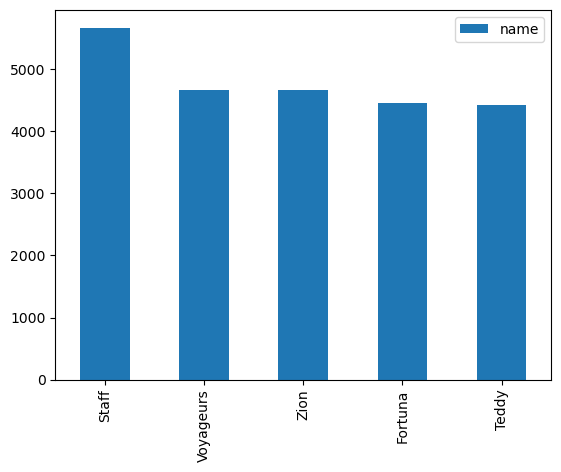

In [23]:
mysql.plot.bar()

<AxesSubplot:>

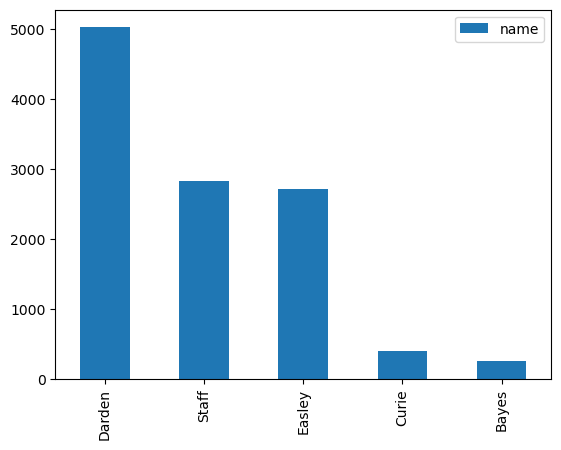

In [24]:
classification.plot.bar()

In [25]:
# Calculating the percentage of data science page visits which 
# were mysql

round((ds[ds.module == 'mysql'].path.count() / len(ds)) * 100, 2)

47.75

In [26]:
# Calculating the percentage of classification page visits

round((ds[ds.module == 'classification'].path.count() / len(ds)) * 100, 2)

6.89

The DS cohort Darden visited the classification page 5,030 times, where the next cohort Easley visted the the classification page 2,715 times. Cohorts seem to visit the mysql page the most acorss the board.

In [27]:
# For web development it does not appear that any one cohort paid 
# significant atttention to any one module that all other cohorts
# seemed to gloss over. The topics visited seem pretty consistant
# and seem all revolve around the same handful of lessons

web_cohorts.sort_values(by='count', ascending=False).head(30)

,,count
name,module,
Ceres,javascript-i,6994
Staff,javascript-i,6301
Ceres,html-css,5929
Zion,javascript-i,5860
Marco,javascript-i,5849
Betelgeuse,javascript-i,5462
Jupiter,javascript-i,5364
Staff,html-css,5322
Fortuna,javascript-i,5167


In [55]:
web_dev.module.value_counts(10)

javascript-i                         0.257379
html-css                             0.184243
jquery                               0.131850
java-iii                             0.123365
java-ii                              0.119659
java-i                               0.089632
javascript-ii                        0.084733
web-design                           0.004755
index.html                           0.003896
css-ii                               0.000095
css-i                                0.000093
javascript                           0.000057
javascript-with-html                 0.000043
florence-python-assessment.html      0.000043
darden-python-assessment.html        0.000025
introduction-to-java                 0.000023
single-page.html                     0.000020
java                                 0.000011
html                                 0.000011
bayes-python-assessment-4586.html    0.000009
alumni-tech-survey-2018.html         0.000007
register.html                     

**3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?**

In [28]:
active_students = df[(df.date <= df.end_date) & (df.date >= df.start_date)]

In [61]:
len(active_students) / len(df)

0.7700364952119529

In [29]:
active_visits = active_students.user_id.value_counts()
len(active_visits)

727

In [30]:
active_counts = pd.DataFrame(active_visits).rename(columns={'user_id': 'count'})

In [31]:
active_counts

,count
344,4675
570,4047
671,3158
685,2957
423,2884
...,...
812,7
539,4
956,4
278,3


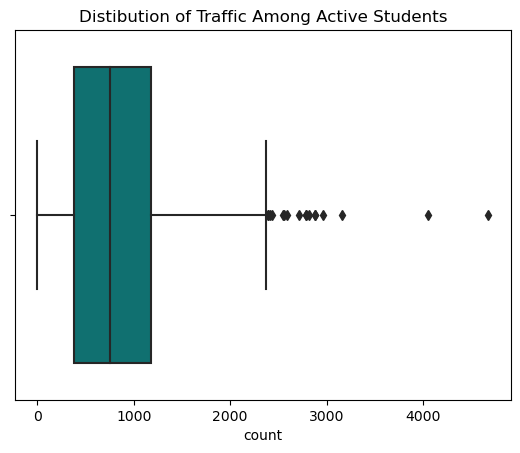

In [32]:
sns.boxplot(data=active_counts, x = 'count', color='teal')
plt.title('Distibution of Traffic Among Active Students')
plt.show()

In [33]:
lower_fence, upper_fence = w.get_fences(df=active_counts, col='count')
print(f'The lower fence for the number of times a student visits the curricilum while active is {lower_fence}')

The lower fence for the number of times a student visits the curricilum while active is -815.5


Okay so we dont have any outliers on the lower end. So lets use quantile 1 as a fence.

In [34]:
q1 = active_counts['count'].quantile(.25)

In [35]:
outliers = active_counts[active_counts['count'] <= q1]

In [36]:
below_q1 = outliers.index

In [37]:
below_q1 = below_q1.to_list()

In [38]:
# These are the 182 users who access the curriculum less than our
# quantile one 

anomalous_users = active_students[active_students.user_id.isin(below_q1)]

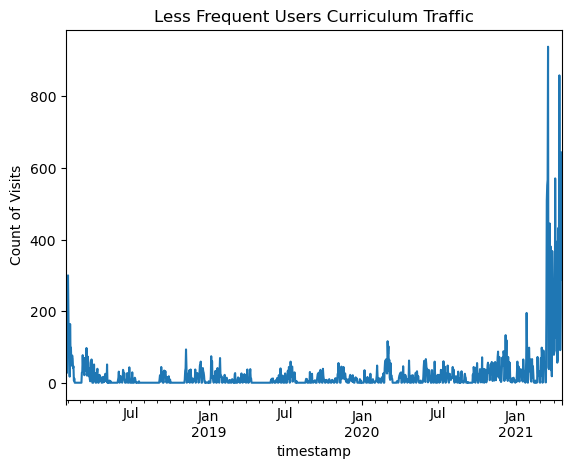

In [39]:
# So what can we say about these anomalous_users?

anomalous_users.resample('D').user_id.count().plot()
plt.title('Less Frequent Users Curriculum Traffic')
plt.ylabel('Count of Visits')
plt.show()

Using time series analysis, we can see that while these users access the curriculum less often than their peers, the traffic seems the pick up exponentially at the end of the dataset. This could be because Codeup enrolled more students during this time than ever before. 

In [40]:
# While these students didnt access the curriculum often while at
# Codeup, lets see what topics they were accessing when they did

anomalous_users.module.value_counts().head(10)

javascript-i    7536
html-css        6064
spring          2109
fundamentals    1780
examples        1279
sql             1163
appendix        1148
mysql           1090
jquery          1050
toc              966
Name: module, dtype: int64

Those students who did look up the material were accessing the javascipt-i page (which follows the pattern we've seen across the web development cohorts). The same can be said for html-css and mysql.

In [41]:
# Lets look at the composition of cohorts in this group.

anomalous_users.name.value_counts(10).head()

Neptune     0.183030
Florence    0.123119
Marco       0.092820
Sequoia     0.069392
Oberon      0.052937
Name: name, dtype: float64

Of the active students whose access in below quantile one, 18% of them were from Neptune cohort, 12% of them were from Florence cohort, and 9% of them were from Marco cohort.

In [42]:
pd.DataFrame(anomalous_users.groupby('user_id').module.count()).sort_values(by='module').mean()

module    159.945055
dtype: float64

The average number of page visits within this group was 159.

In [43]:
pd.DataFrame(anomalous_users.groupby('user_id').module.count()).sort_values(by='module').head(20)

,module
user_id,
832,2
278,3
956,4
539,4
812,7
388,7
941,10
679,10
572,11


The bottom 20 of these students had a max page visit of 25 and a min page visit of 2.

In [63]:
df.groupby('user_id').count().mean()

date            891.518354
time            891.518354
path            891.518354
cohort_id       891.518354
ip              891.518354
name            891.518354
start_date      891.518354
end_date        891.518354
module          891.518354
lesson          891.518354
web_dev         891.518354
data_science    891.518354
dtype: float64

In [44]:
# Lets look at the student with only 2 page visits their entire time
# as a Codeup student

anomalous_users[anomalous_users.user_id == 832]

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,module,lesson,web_dev,data_science
timestamp,,,,,,,,,,,,,
2020-12-07 14:22:38,2020-12-07,14:22:38,[javascript-i],832,62.0,69.154.52.98,Jupiter,2020-09-21,2021-03-30,javascript-i,javascript-i,1,0
2020-12-07 14:22:39,2020-12-07,14:22:39,[html-css],832,62.0,69.154.52.98,Jupiter,2020-09-21,2021-03-30,html-css,html-css,1,0


This student was from the Jupiter cohort. They were a web dev student. They attended Codeup from Sept 21, 2020 through March 30, 2021. They were accessing the html-css and the javascript-i pages.
Both of the visits occurred on the same day within 1 second of each other. 

**7. Which lessons are least accessed?**

In [45]:
web_dev.head(3)

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,module,lesson,web_dev,data_science
timestamp,,,,,,,,,,,,,
2018-01-26 09:56:02,2018-01-26,09:56:02,[java-ii],1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,java-ii,java-ii,1,0
2018-01-26 09:56:05,2018-01-26,09:56:05,"[java-ii, object-oriented-programming]",1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,java-ii,object-oriented-programming,1,0
2018-01-26 09:56:24,2018-01-26,09:56:24,"[javascript-i, conditionals]",2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,javascript-i,conditionals,1,0


In [46]:
ds.head(3)

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,module,lesson,web_dev,data_science
timestamp,,,,,,,,,,,,,
2018-01-26 10:08:34,2018-01-26,10:08:34,"[git, merge-conflict-demo]",10,21.0,97.105.19.61,Sequoia,2017-09-27,2018-02-15,git,merge-conflict-demo,0,1
2018-01-26 10:08:55,2018-01-26,10:08:55,"[git, working-in-teams]",10,21.0,97.105.19.61,Sequoia,2017-09-27,2018-02-15,git,working-in-teams,0,1
2018-01-26 11:48:17,2018-01-26,11:48:17,[mysql],16,21.0,97.105.19.61,Sequoia,2017-09-27,2018-02-15,mysql,mysql,0,1


In [47]:
web_dev.module.value_counts()

javascript-i                         113838
html-css                              81490
jquery                                58317
java-iii                              54564
java-ii                               52925
java-i                                39644
javascript-ii                         37477
web-design                             2103
index.html                             1723
css-ii                                   42
css-i                                    41
javascript                               25
javascript-with-html                     19
florence-python-assessment.html          19
darden-python-assessment.html            11
introduction-to-java                     10
single-page.html                          9
java                                      5
html                                      5
bayes-python-assessment-4586.html         4
alumni-tech-survey-2018.html              3
register.html                             2
web-dev-day-two                 

In [65]:
ds.module.value_counts()

mysql                                   79416
classification                          11453
sql                                      9035
3-sql                                    7408
python                                   6718
6-regression                             5845
4-python                                 5788
5-stats                                  3984
stats                                    3936
regression                               3828
7-classification                         3706
10-anomaly-detection                     3516
clustering                               2850
anomaly-detection                        2827
8-clustering                             2515
storytelling                             2195
9-timeseries                             2177
2-storytelling                           2116
timeseries                               2080
12-distributed-ml                        1231
distributed-ml                            776
Intro_to_Regression_Module        

**6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?**

In [48]:
grads = df[df['date'] > df['end_date']]

In [64]:
len(grads) / len(df)

0.22996350478804703

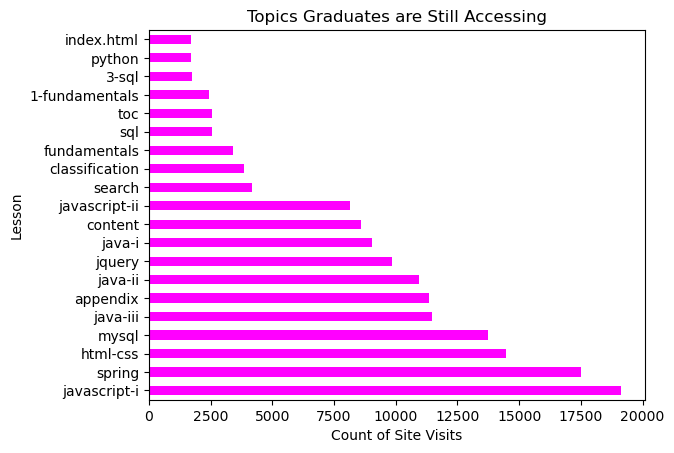

In [50]:
grads['module'].value_counts().head(20).plot.barh(colormap='spring')
plt.title('Topics Graduates are Still Accessing')
plt.xlabel('Count of Site Visits')
plt.ylabel('Lesson')
plt.show()

In [51]:
df[(df['module'].str.contains('ja')) & (df['module'].isna() == False)].module.value_counts().sum()

298525

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 801475 entries, 2018-01-26 09:56:02 to 2021-04-21 16:44:39
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date          801475 non-null  datetime64[ns]
 1   time          801475 non-null  object        
 2   path          801475 non-null  object        
 3   user_id       801475 non-null  int64         
 4   cohort_id     801475 non-null  float64       
 5   ip            801475 non-null  object        
 6   name          801475 non-null  object        
 7   start_date    801475 non-null  datetime64[ns]
 8   end_date      801475 non-null  datetime64[ns]
 9   module        801475 non-null  object        
 10  lesson        801475 non-null  object        
 11  web_dev       801475 non-null  int64         
 12  data_science  801475 non-null  int64         
dtypes: datetime64[ns](3), float64(1), int64(3), object(6)
memory usage: 85.6+ MB


In [53]:
grads['module'].value_counts().head(20)

javascript-i      19137
spring            17486
html-css          14482
mysql             13755
java-iii          11459
appendix          11339
java-ii           10944
jquery             9830
java-i             9032
content            8585
javascript-ii      8136
search             4177
classification     3867
fundamentals       3410
sql                2573
toc                2564
1-fundamentals     2444
3-sql              1745
python             1723
index.html         1721
Name: module, dtype: int64